In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import os
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import numpy as np
import random

# Fetching the dataset

In [2]:
data_exp_path = os.getcwd()
knn_path = os.path.abspath(os.path.join(data_exp_path, '../'))
repo_path = os.path.abspath(os.path.join(knn_path, '../'))
data_path = os.path.abspath(os.path.join(repo_path, '../data'))
augmented_dataset = os.path.abspath(os.path.join(data_path, 'AugmentedAlzheimerDataset'))
original_dataset = os.path.abspath(os.path.join(data_path, 'OriginalDataset'))

In [3]:
directory = original_dataset
dataset = []

categories = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

counter = 0
for category in categories:
    path = os.path.join(directory, category)
    label = categories.index(category)
    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        brain_img = imread(imgpath, 0)
        image = np.array(brain_img).flatten()
        dataset.append([image, label])
        counter += 1
        
        if counter % 1000 == 0:
            print("Loaded", counter)

Loaded 1000
Loaded 2000
Loaded 3000
Loaded 4000
Loaded 5000
Loaded 6000


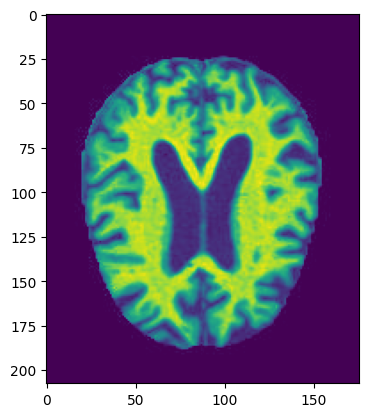

In [4]:
plt.imshow(dataset[0][0].reshape(208, 176))

# Data Preprocessing

In [5]:
def shuffle_data(data=dataset, num_shuffles=3):
    def shuffle_value():
        return random.random()
    
    for i in range(num_shuffles):
        random.shuffle(data)
        
    return data

In [6]:
# Show the dataset BEFORE shuffling:
print("Dataset is a", type(dataset), "of length", len(dataset))
print("Each row corresponds to an image")

print("\nLet's dive into each of the images")
print("Each image is a", type(dataset[0]), "of length", len(dataset[0]))

print("\nThe first element of the list stores the image itself, and the second element is the class")
print("Let's look through the first element of the list")

print("\nThis element is a", type(dataset[0][0]), "with shape", dataset[0][0].shape)
print("Thus, it is the image flattened into an array")

Dataset is a <class 'list'> of length 6400
Each row corresponds to an image

Let's dive into each of the images
Each image is a <class 'list'> of length 2

The first element of the list stores the image itself, and the second element is the class
Let's look through the first element of the list

This element is a <class 'numpy.ndarray'> with shape (36608,)
Thus, it is the image flattened into an array


### Shuffling and Verification

In [7]:
# Let's store the first image of the original list to guarantee that shuffling has actually taken place
first_image_original = dataset[0][0]

In [8]:
dataset = shuffle_data(dataset)

In [9]:
# Now to verify that the dataset was actually shuffled...
first_image_new = dataset[0][0]

if (first_image_original == first_image_new).all():
    print("Dataset was NOT shuffled.")
else:
    print("Dataset was shuffled. Images are different.")

Dataset was shuffled. Images are different.


In [10]:
count, total = 0, 0
for pixel in range(first_image_new.size):
    if first_image_new[pixel] != first_image_original[pixel]:
        count += 1
    total += 1
print("{:.2f}% of pixels differ".format(count * 100 / total))

54.62% of pixels differ


### Splitting into Train and Test

In [11]:
# X is all of our images
X = [x[0] for x in dataset]

# y is our associated targets
y = [x[1] for x in dataset]

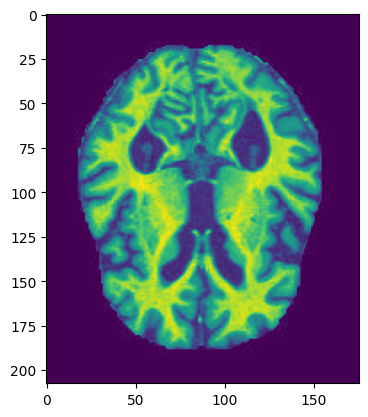

In [12]:
# verifying that this actually worked
plt.imshow(X[0].reshape(208, 176))

In [13]:
# Note that we have already shuffled, so we are just shuffling again for precaution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Creation

In [14]:
number_neighbors = [1, 3, 7, 10, 15, 20, 30]
train_acc = []
test_acc = []
for num_neigh in number_neighbors:
    knn = KNeighborsClassifier(n_neighbors=num_neigh)
    knn.fit(X_train, y_train)
    train_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))
    print("{} Neighbors had accuracy of {:.2f}%".format(num_neigh, knn.score(X_test, y_test) * 100))

1 Neighbors had accuracy of 100.00%
3 Neighbors had accuracy of 98.98%
7 Neighbors had accuracy of 95.31%
10 Neighbors had accuracy of 89.69%
15 Neighbors had accuracy of 83.52%
20 Neighbors had accuracy of 77.03%
30 Neighbors had accuracy of 68.83%


# Model Analysis

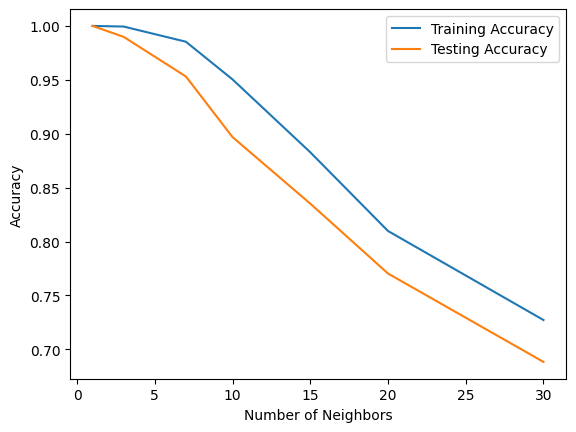

In [15]:
plt.plot(number_neighbors, train_acc, label='Training Accuracy')
plt.plot(number_neighbors, test_acc, label='Testing Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Why is it significant that we are getting the SAME accuracy while varying K?

Getting the same accuracy while varying K tells us that classification for us is primarily focused on how closely related the individual pixel values are to the other images

Since we later determiend that the dataset - contrary to what we initially believed - is actually just repeated images at different layers of the same MRI scans, it makes sense that we are seeing this behavior.

We should try the same approaches, while leaving all images of ONE brain out of training and using it as the test.

When we do this, we will likely see VERY different results, since there will not be immediately comparable pixel values